In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_parquet('../Data/credit_card_data_train.parquet')

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  str    
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  str    
 4   category               1296675 non-null  str    
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  str    
 7   last                   1296675 non-null  str    
 8   gender                 1296675 non-null  str    
 9   street                 1296675 non-null  str    
 10  city                   1296675 non-null  str    
 11  state                  1296675 non-null  str    
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long                   129667

In [4]:
print(data.nunique())


Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


In [5]:
#DF continning time of fraud
df_time_fraud = data.loc[data['is_fraud']==1 , ['unix_time']]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

### We Observe many fraud Transaction Occurs near the same time

In [7]:
df_time_fraud['Date'] = pd.to_datetime(df_time_fraud['unix_time'], unit='s')
df_time_fraud

,unix_time,Date
2449,1325466397,2012-01-02 01:06:37
2472,1325468849,2012-01-02 01:47:29
2523,1325473523,2012-01-02 03:05:23
2546,1325475483,2012-01-02 03:38:03
2553,1325476547,2012-01-02 03:55:47
...,...,...
1295399,1371776408,2013-06-21 01:00:08
1295491,1371779615,2013-06-21 01:53:35
1295532,1371781016,2013-06-21 02:16:56
1295666,1371785180,2013-06-21 03:26:20


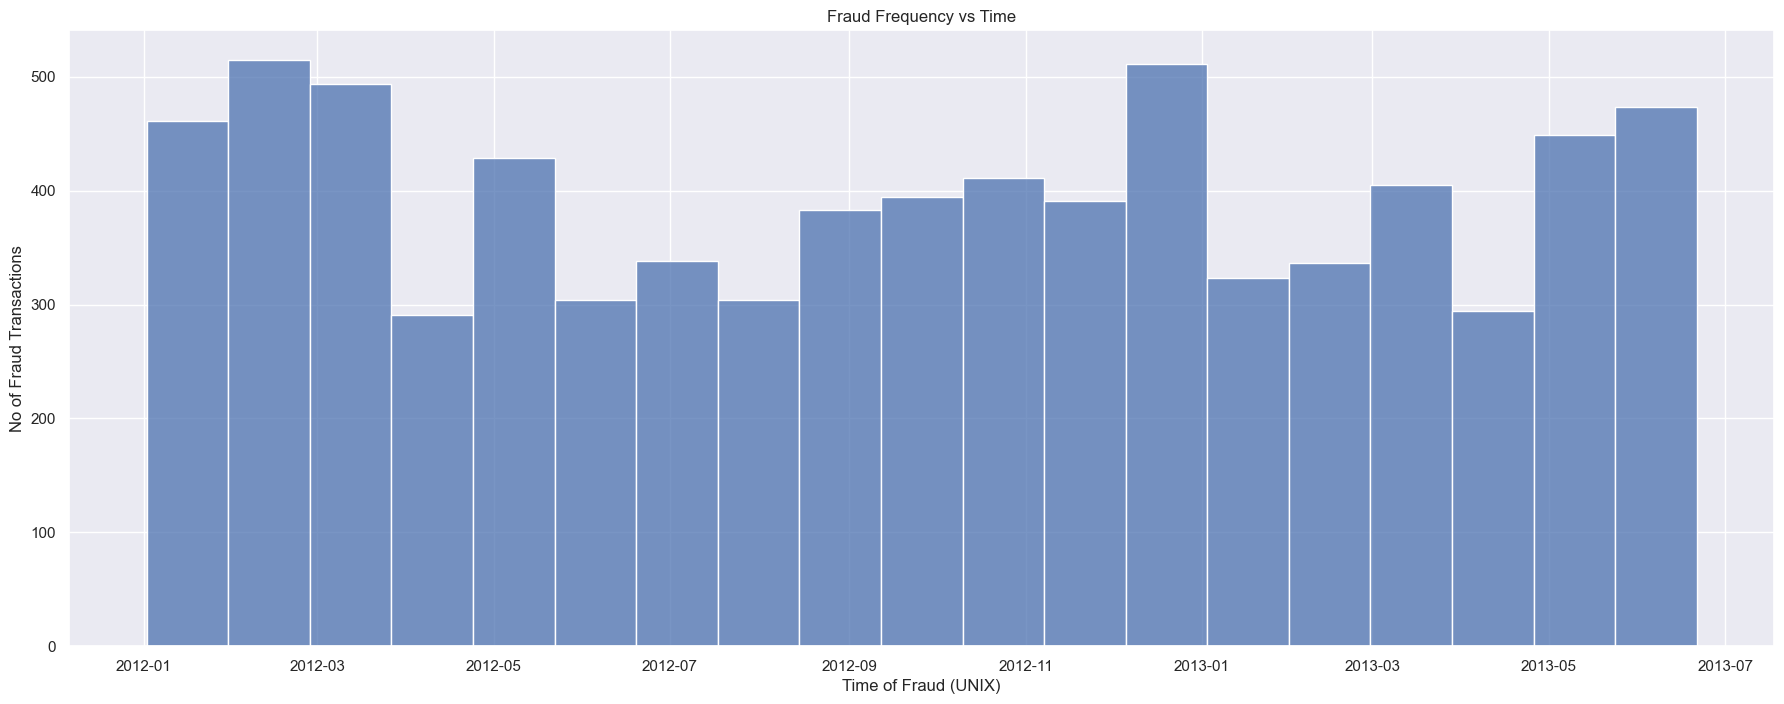

In [8]:
plt.figure(figsize=(22,8))
plt.title('Fraud Frequency vs Time')
sns.histplot(data = df_time_fraud, x="Date")
plt.xlabel('Time of Fraud (UNIX)')
plt.ylabel('No of Fraud Transactions')
plt.show()

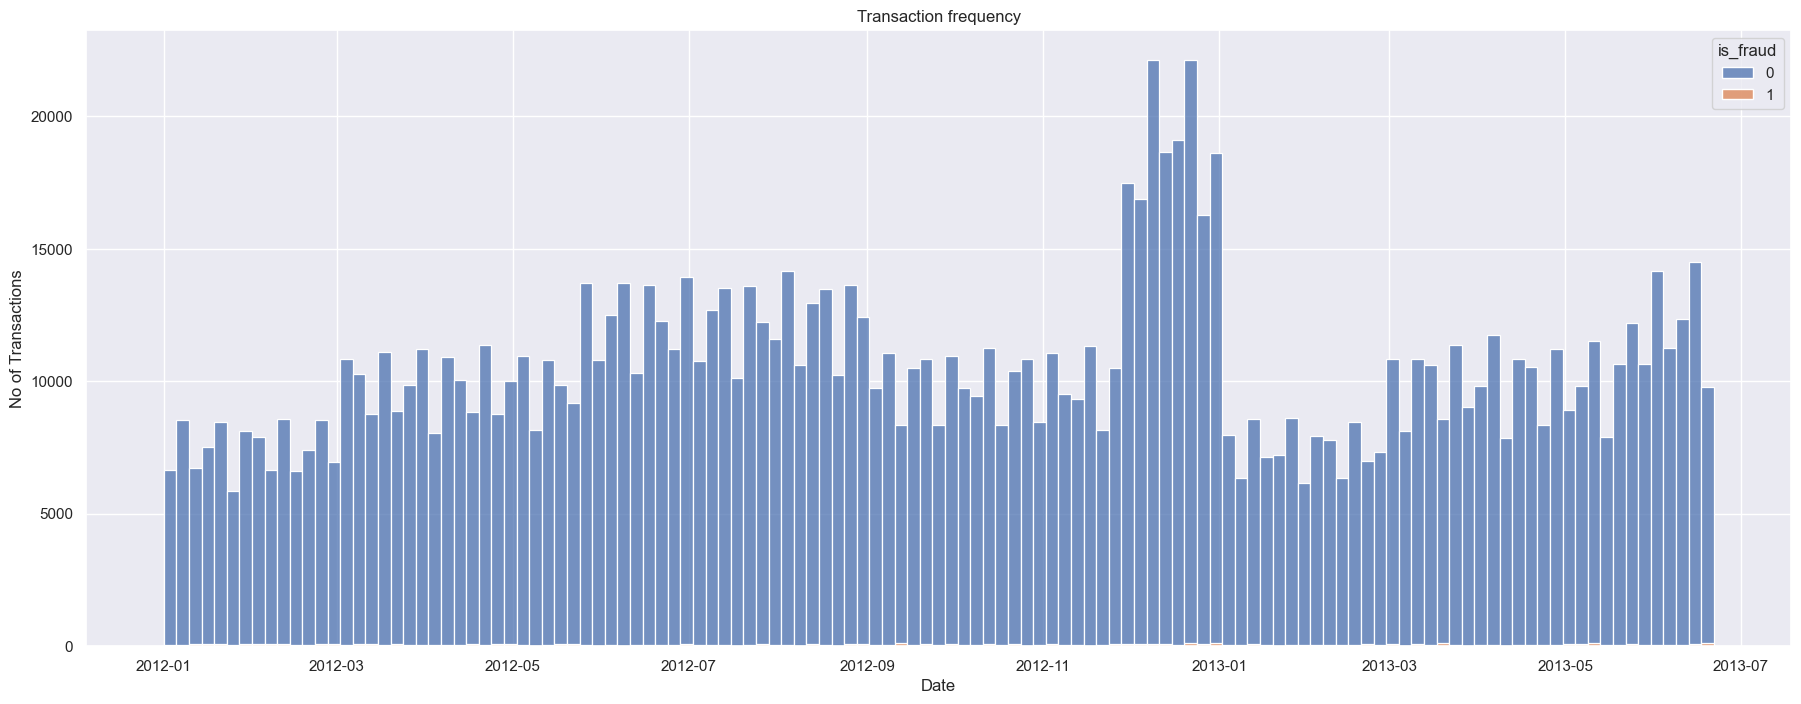

In [9]:
whole_data_transaction_time = data[['unix_time' , 'is_fraud']]
whole_data_transaction_time['Date'] = pd.to_datetime(whole_data_transaction_time['unix_time'] , unit='s')
plt.figure(figsize=(22,8))
plt.title("Transaction frequency")
sns.histplot(data = whole_data_transaction_time , x="Date" , hue="is_fraud", multiple="stack")
plt.xlabel("Date")
plt.ylabel('No of Transactions')
plt.show()

## We can Observe 3 clusters which concludes the following  
* Fraudster test the credit car first by spending 1$  
* Most of the Frauds are in the range of (200-400)$ or (600-1200)$, This may be due to daily payment limit on Card

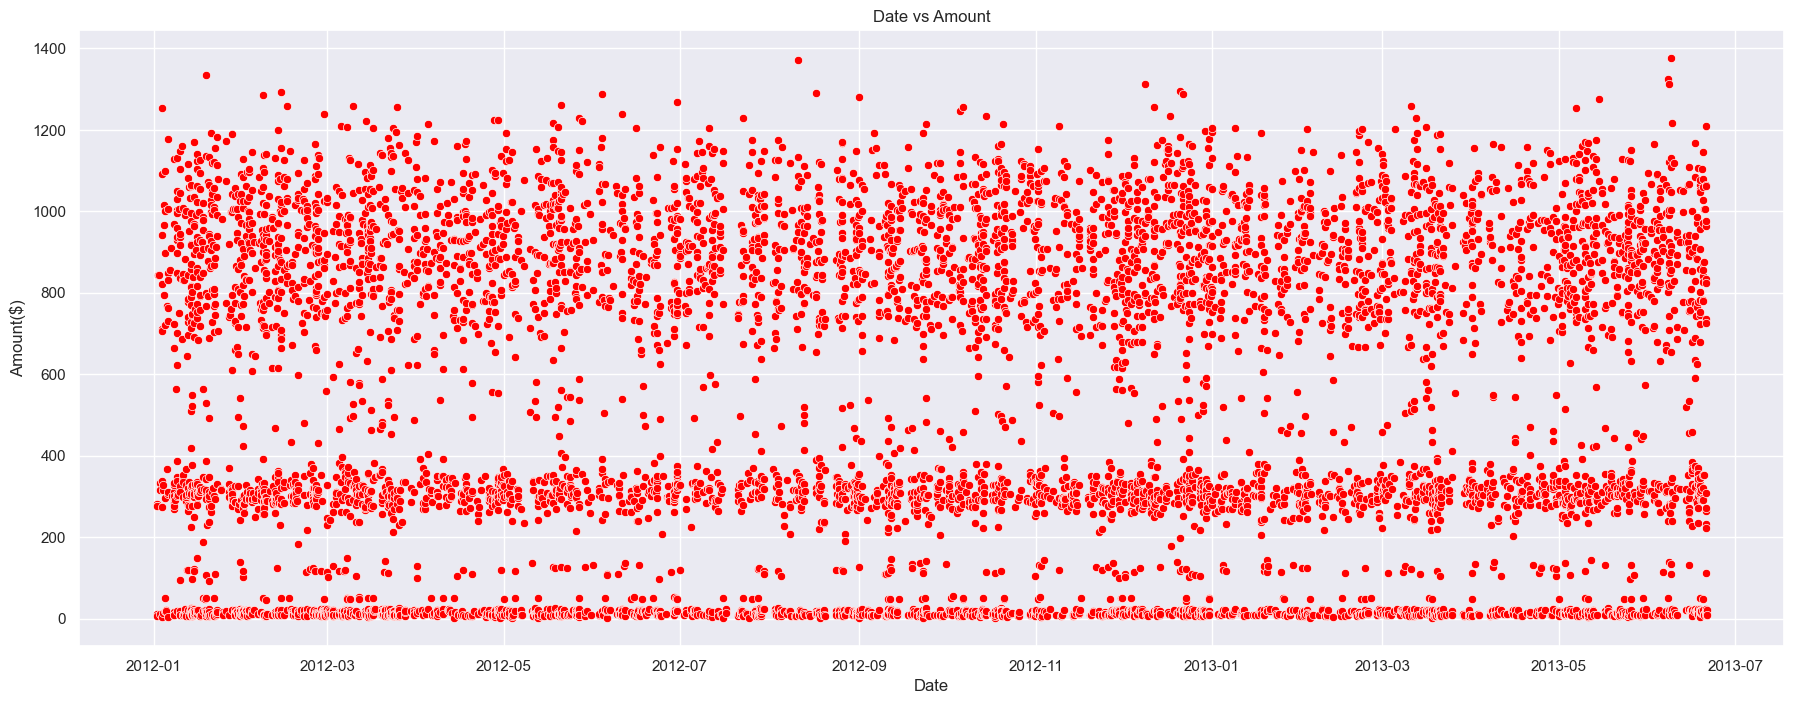

In [10]:
time_amount = data[['unix_time' , 'is_fraud' , 'amt']]
time_amount['Date'] = pd.to_datetime(whole_data_transaction_time['unix_time'] , unit='s')

time_amount_fraud = time_amount.loc[time_amount['is_fraud']==1]
plt.figure(figsize=(22,8))
plt.title("Date vs Amount")
sns.scatterplot(data = time_amount_fraud, x='Date',y='amt', color='red')
plt.xlabel("Date")
plt.ylabel("Amount($)")
plt.show()

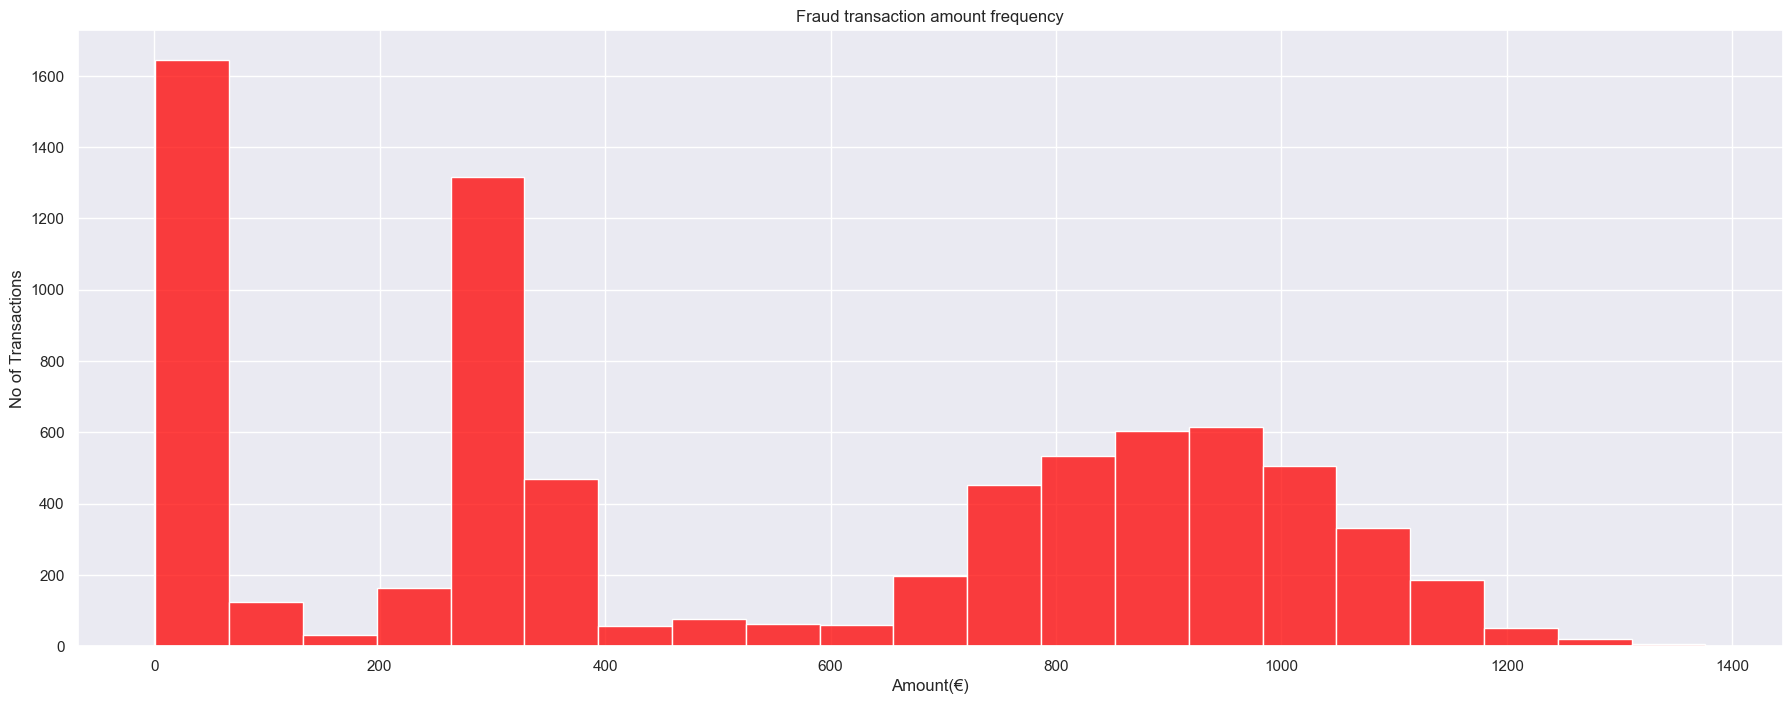

In [11]:
plt.figure(figsize=(22,8))
plt.title("Fraud transaction amount frequency")
sns.histplot(data = time_amount_fraud , x="amt" , color='red')
plt.xlabel("Amount(€)")
plt.ylabel('No of Transactions')
plt.show()

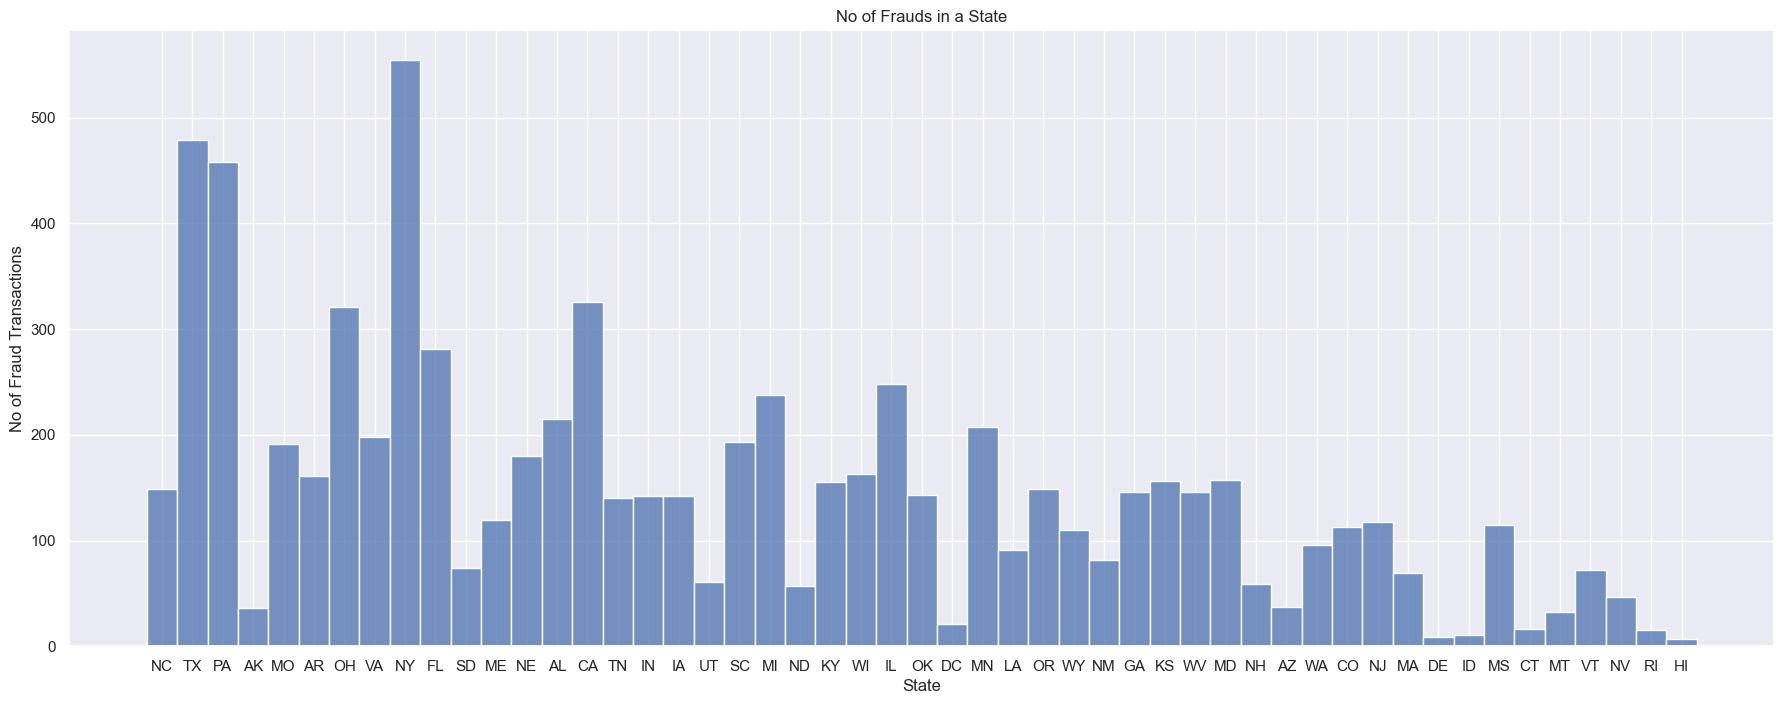

In [14]:
state_data = data[['state' , 'is_fraud' , 'amt']]
state_data = state_data.loc[state_data['is_fraud']==1]
plt.figure(figsize=(22,8))
plt.title("No of Frauds in a State")
sns.histplot(data = state_data, x="state")
plt.xlabel("State")
plt.ylabel('No of Fraud Transactions')
plt.show()